In [7]:
import h5py
import numpy as np
import scanpy as sc
import random
import torch

#from reproducibility.utils import data_sample, data_preprocess, set_seed
from scace import run_scace

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 # set global dpi

## Data Preprocessing

In [9]:
##################################  Set Seed  ####################################
seed = 2023
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

####################################  Read dataset  ####################################
data_mat = h5py.File('/Users/jiayi_liu/Desktop/scAce-notes/reproducibility/data/Sim.h5')
x, y = np.array(data_mat['X']), np.array(data_mat['Y'])
data_mat.close()

adata = sc.AnnData(x)
adata.obs['celltype'] = y

##################################  Preform Data Preprocessing ####################################
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
adata.raw = adata.copy()

adata.X = adata.X.astype('float64')
sc.pp.normalize_per_cell(adata)
adata.obs['scale_factor'] = adata.obs.n_counts / adata.obs.n_counts.mean()

sc.pp.log1p(adata)
sc.pp.scale(adata)

In [10]:
adata

AnnData object with n_obs × n_vars = 1150 × 12305
    obs: 'celltype', 'n_genes', 'n_counts', 'scale_factor'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

## Run scAce

In default mode, function `run_scace` would return an AnnData object with embedding and clustering result stored in `adata.obsm['scace_emb']` and `adata.obs['scace_cluster']`

In [6]:
# adata = run_scace(adata)

If return_all is True, function `run_scace` would print and return all temporate results:

- K: Final number of clusters.
- pred_all: All temporary clustering results.
- emb_all: All temporary embedding.


In [7]:
# adata, K, pred_all, emb_all, run_time = run_scace(adata, return_all=True)

If the key of grount truth cell type (i.e. `cl_type`) is also provided, ARI and NMI will also be returned.

In [11]:
adata, nmi, ari, K, pred_all, emb_all, run_time = run_scace(
    adata,
    cl_type='celltype',
    return_all=True,
    pretrained_ckpt='/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_sim.pth'
)

Pre-trained model provided, load checkpoint from file "/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_sim.pth".
Perform initial clustering through leiden with resolution = 2
Finish initial clustering! Number of initial clusters is 15
Initial Clustering: NMI= 0.6485, ARI= 0.2783
Start training! Total epochs is 500.


Training::   0%|                                     | 0/500 [00:00<?, ?epoch/s]

Train epoch [1/500]. ZINB loss:0.2977, kld loss:8.6349, cluster loss:0.3934, total loss:0.7774


Training::   0%|                             | 1/500 [00:06<54:06,  6.51s/epoch]

Clustering   1: NMI= 0.6471, ARI= 0.2672, Delta=0.1296
Train epoch [2/500]. ZINB loss:0.2979, kld loss:10.5911, cluster loss:0.4183, total loss:0.8221


Training::   0%|                           | 2/500 [00:14<1:01:11,  7.37s/epoch]

Clustering   2: NMI= 0.6470, ARI= 0.2670, Delta=0.0783
Train epoch [3/500]. ZINB loss:0.2970, kld loss:12.2553, cluster loss:0.4111, total loss:0.8306


Training::   1%|▏                          | 3/500 [00:22<1:02:05,  7.50s/epoch]

Clustering   3: NMI= 0.6532, ARI= 0.2706, Delta=0.0504
Train epoch [4/500]. ZINB loss:0.2971, kld loss:13.4255, cluster loss:0.4201, total loss:0.8514


Training::   1%|▏                          | 4/500 [00:30<1:04:42,  7.83s/epoch]

Clustering   4: NMI= 0.6540, ARI= 0.2717, Delta=0.0539
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 14
count_true: 91
count: 68
-----------------iter: 2-----------------
n_clusters: 13
count_true: 78
count: 59
-----------------iter: 3-----------------
n_clusters: 12
count_true: 66
count: 53
-----------------iter: 4-----------------
n_clusters: 11
count_true: 55
count: 45
-----------------iter: 5-----------------
n_clusters: 10
count_true: 45
count: 39
-----------------iter: 6-----------------
n_clusters: 9
count_true: 36
count: 32
-----------------iter: 7-----------------
n_clusters: 8
count_true: 28
count: 25
-----------------iter: 8-----------------
n_clusters: 7
count_true: 21
count: 19
-----------------iter: 9-----------------
n_clusters: 6
count_true: 15
count: 15
Reach count!
Train epoch [5/500]. ZINB loss:0.2964, kld loss:15.5361, cluster loss:0.4917, total loss:0.9435


Training::   1%|▎                          | 5/500 [00:40<1:11:56,  8.72s/epoch]

Clustering   5: NMI= 0.8646, ARI= 0.6627, Delta=0.0287
Train epoch [6/500]. ZINB loss:0.2967, kld loss:19.4912, cluster loss:0.4476, total loss:0.9392


Training::   1%|▎                          | 6/500 [00:48<1:08:46,  8.35s/epoch]

Clustering   6: NMI= 0.8668, ARI= 0.6609, Delta=0.5783
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!
Train epoch [7/500]. ZINB loss:0.2961, kld loss:22.3281, cluster loss:0.3912, total loss:0.9106


Training::   1%|▍                          | 7/500 [00:56<1:07:20,  8.20s/epoch]

Clustering   7: NMI= 0.9844, ARI= 0.9906, Delta=0.0348
Train epoch [8/500]. ZINB loss:0.2954, kld loss:25.4549, cluster loss:0.3550, total loss:0.9049


Training::   2%|▍                          | 8/500 [01:04<1:06:07,  8.06s/epoch]

Clustering   8: NMI= 0.9879, ARI= 0.9930, Delta=0.3130
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!
Stop merging clusters! Continue updating several rounds.
Train epoch [9/500]. ZINB loss:0.2954, kld loss:26.9900, cluster loss:0.3283, total loss:0.8936


Training::   2%|▍                          | 9/500 [01:12<1:05:36,  8.02s/epoch]

Clustering   9: NMI= 0.9879, ARI= 0.9930, Delta=0.0009
Reach tolerance threshold. Stopping training.
Total time: 80.70437693595886 seconds


In [13]:
print("ARI = {}, NMI = {}".format(ari, nmi))

ARI = 0.99296, NMI = 0.98786


## Visualization

### Show final clustering results

In [14]:
# Use embedding `scace_emb` to perfrom U-map
sc.pp.neighbors(adata, use_rep='scace_emb')
sc.tl.umap(adata)

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


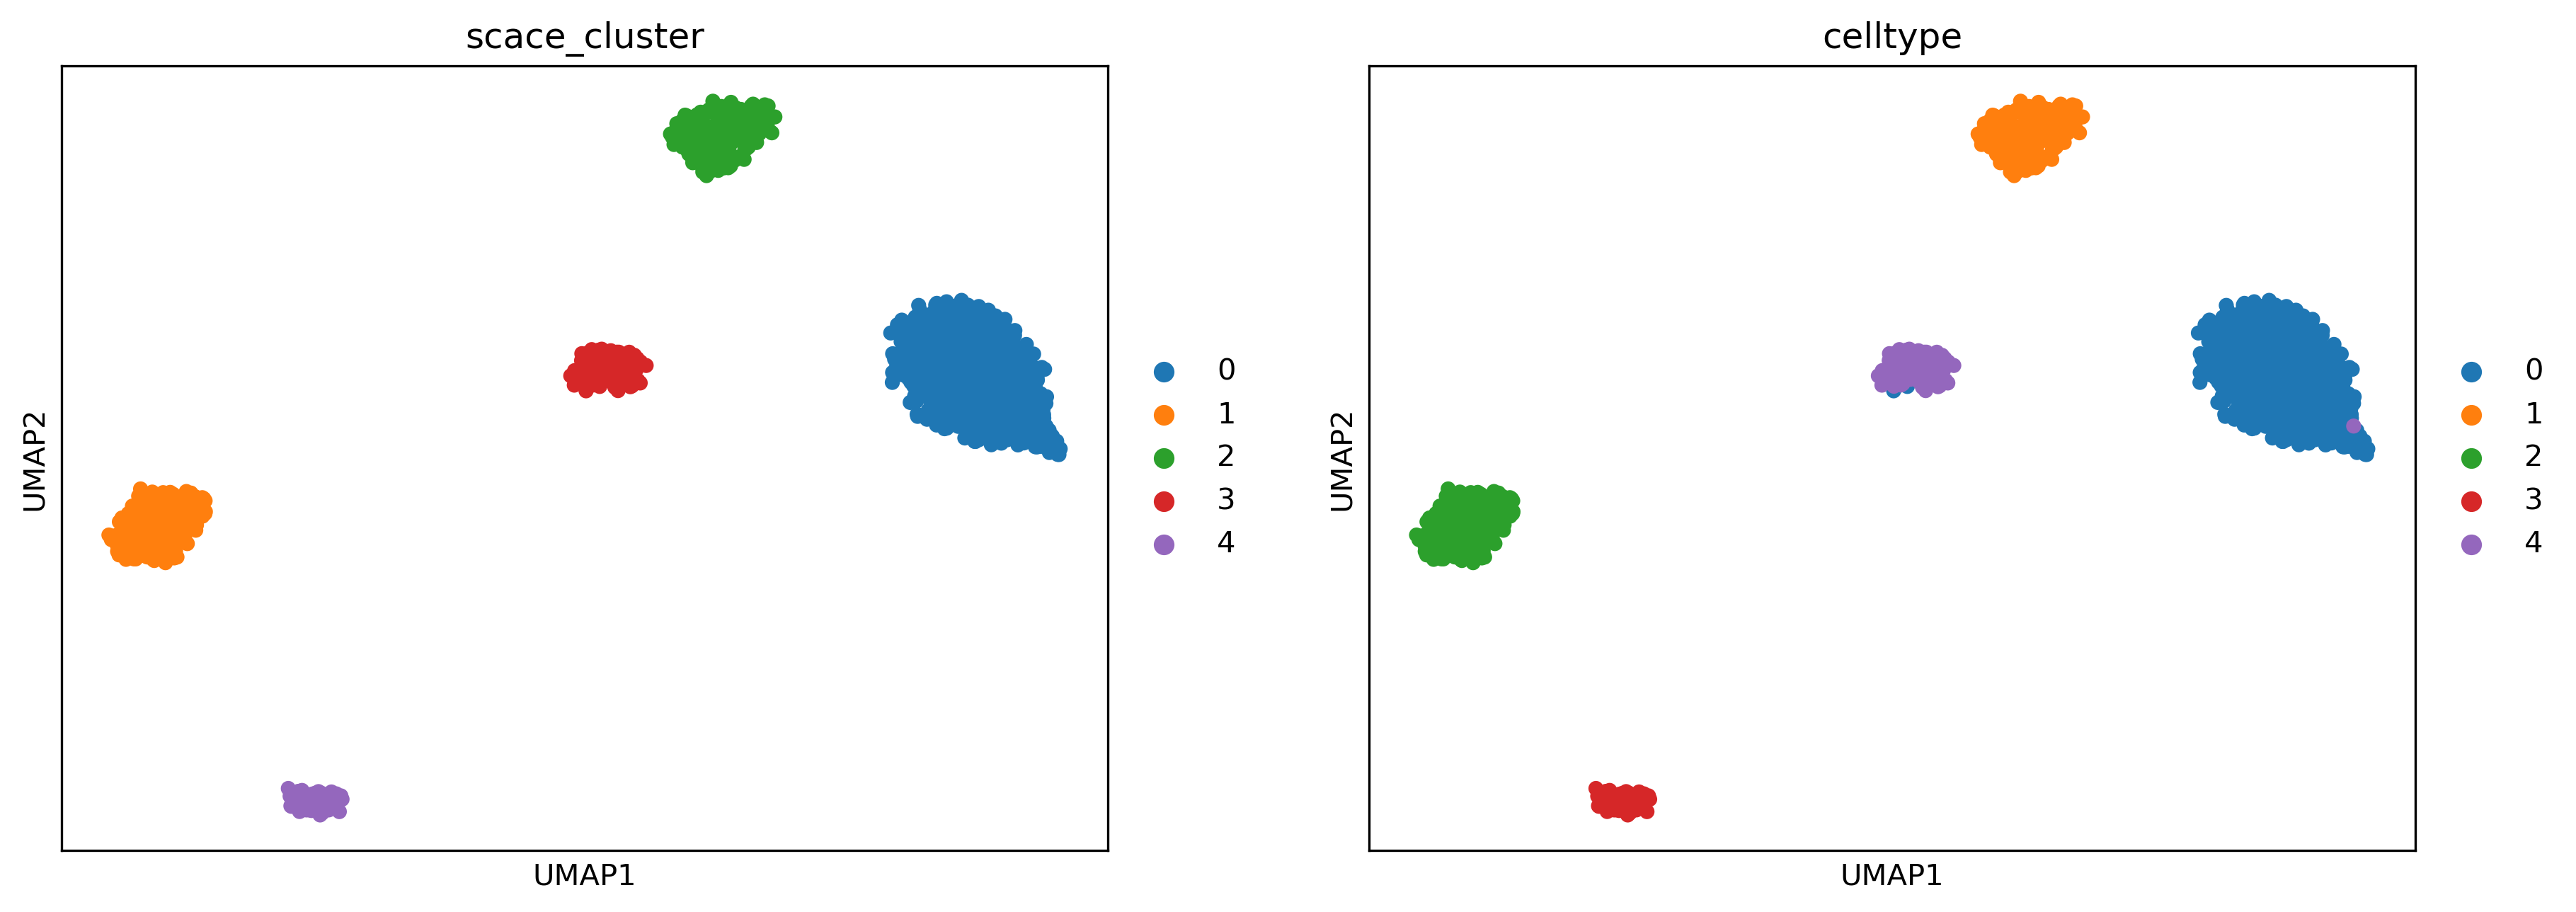

In [15]:
adata.obs['celltype'] = adata.obs['celltype'].astype(int).astype('category')
adata.obs['scace_cluster'] = adata.obs['scace_cluster'].astype(int).astype('category')
sc.pl.umap(adata, color=['scace_cluster', 'celltype'])

### Show initial clustering results

In [16]:
# emb_all[0] is the embedding after pre-training
# pred_all[0] is the initial clustering result after pre-training

adata_tmp = sc.AnnData(emb_all[0])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_cluster'] = pred_all[0]
adata_tmp.obs['scace_cluster'] = adata_tmp.obs['scace_cluster'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


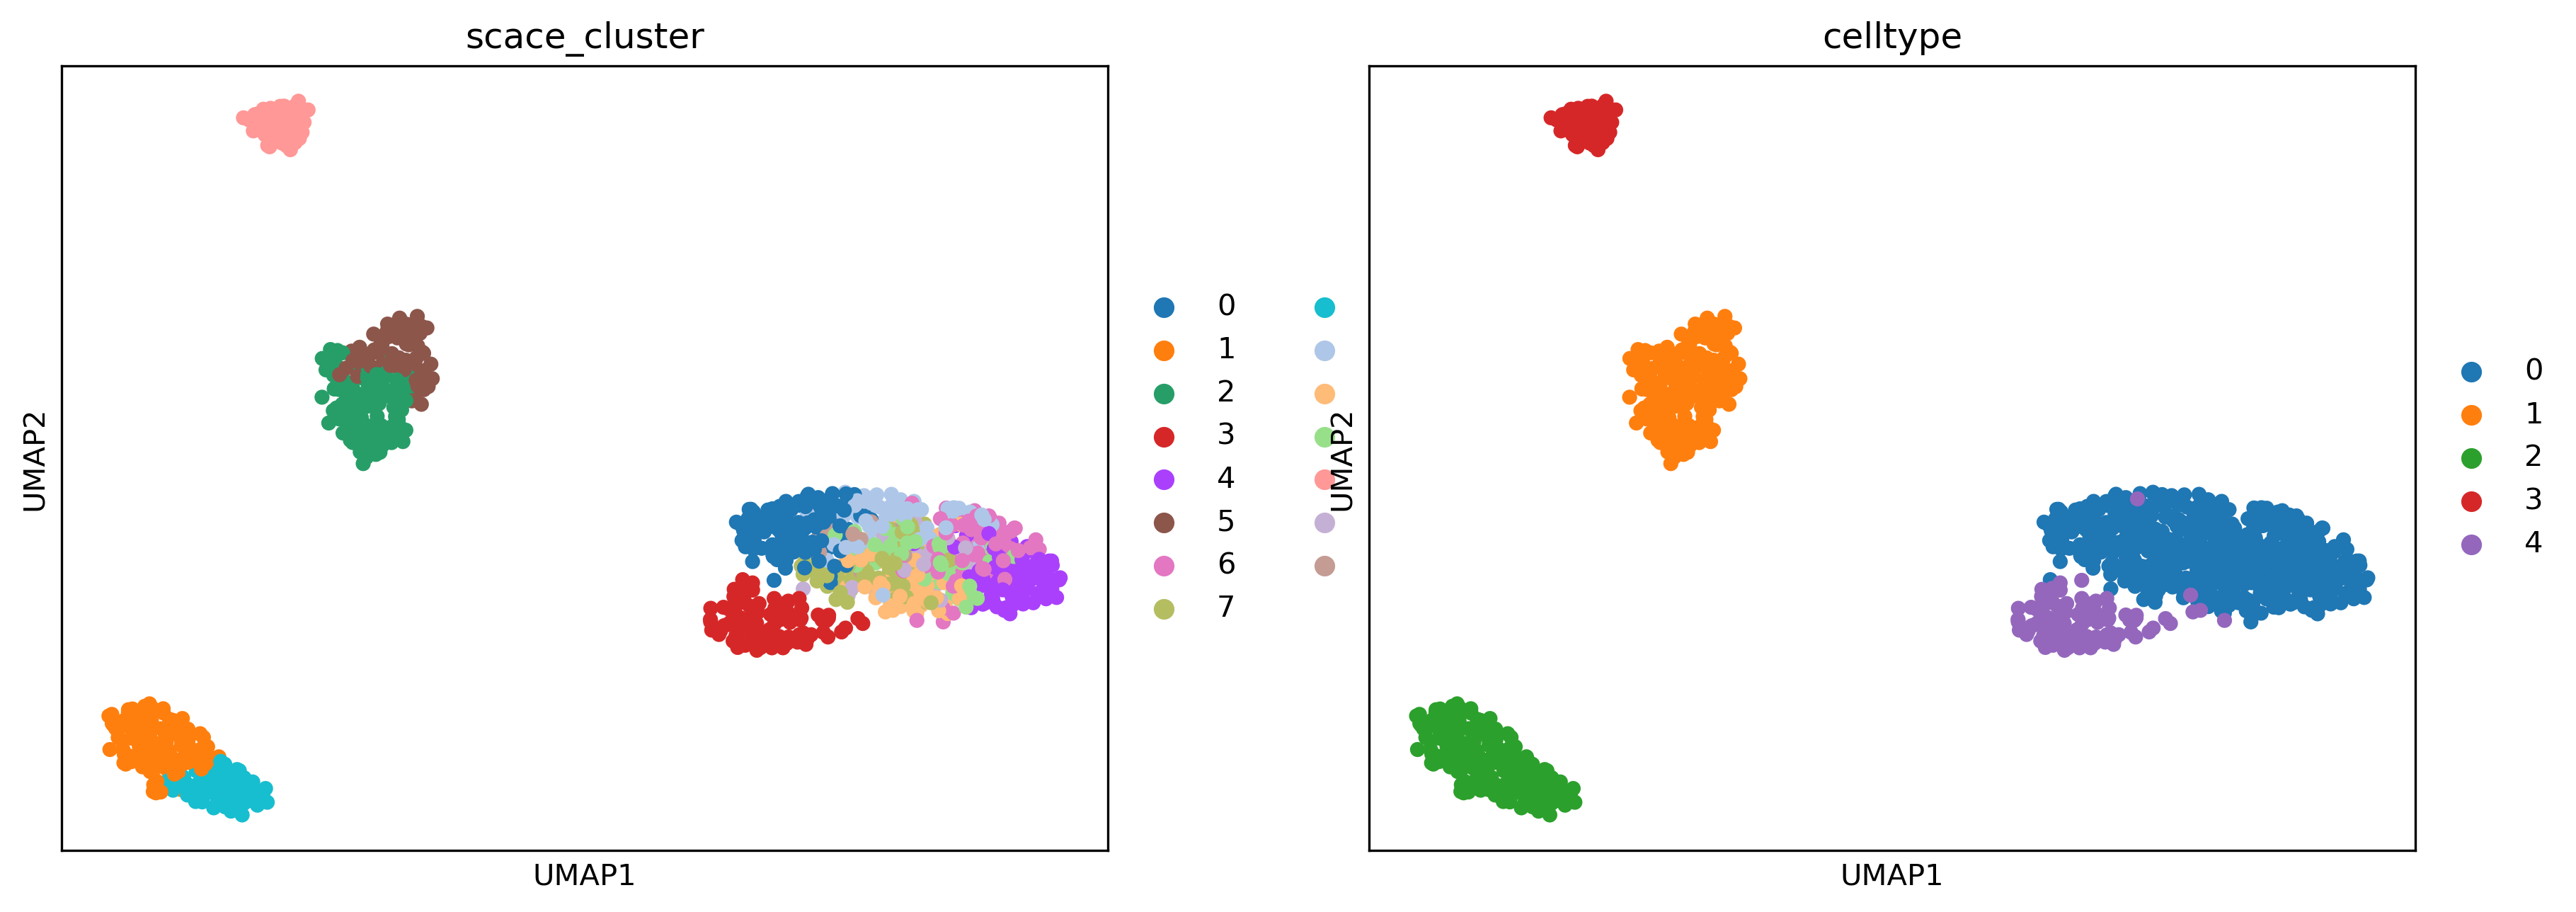

In [17]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_cluster', 'celltype'])

### Show clustering results before and after cluster merging

For the first time

In [18]:
# emb_all[1] is the embedding of the first cluster merging.
# pred_all[1] is the all clustering results from the first cluster merging, where
# pred_all[1][0] is the clustering result before cluster merging, and
# pred_all[1][0] is the clustering result after cluster merging.

adata_tmp = sc.AnnData(emb_all[1])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[1][0], pred_all[1][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


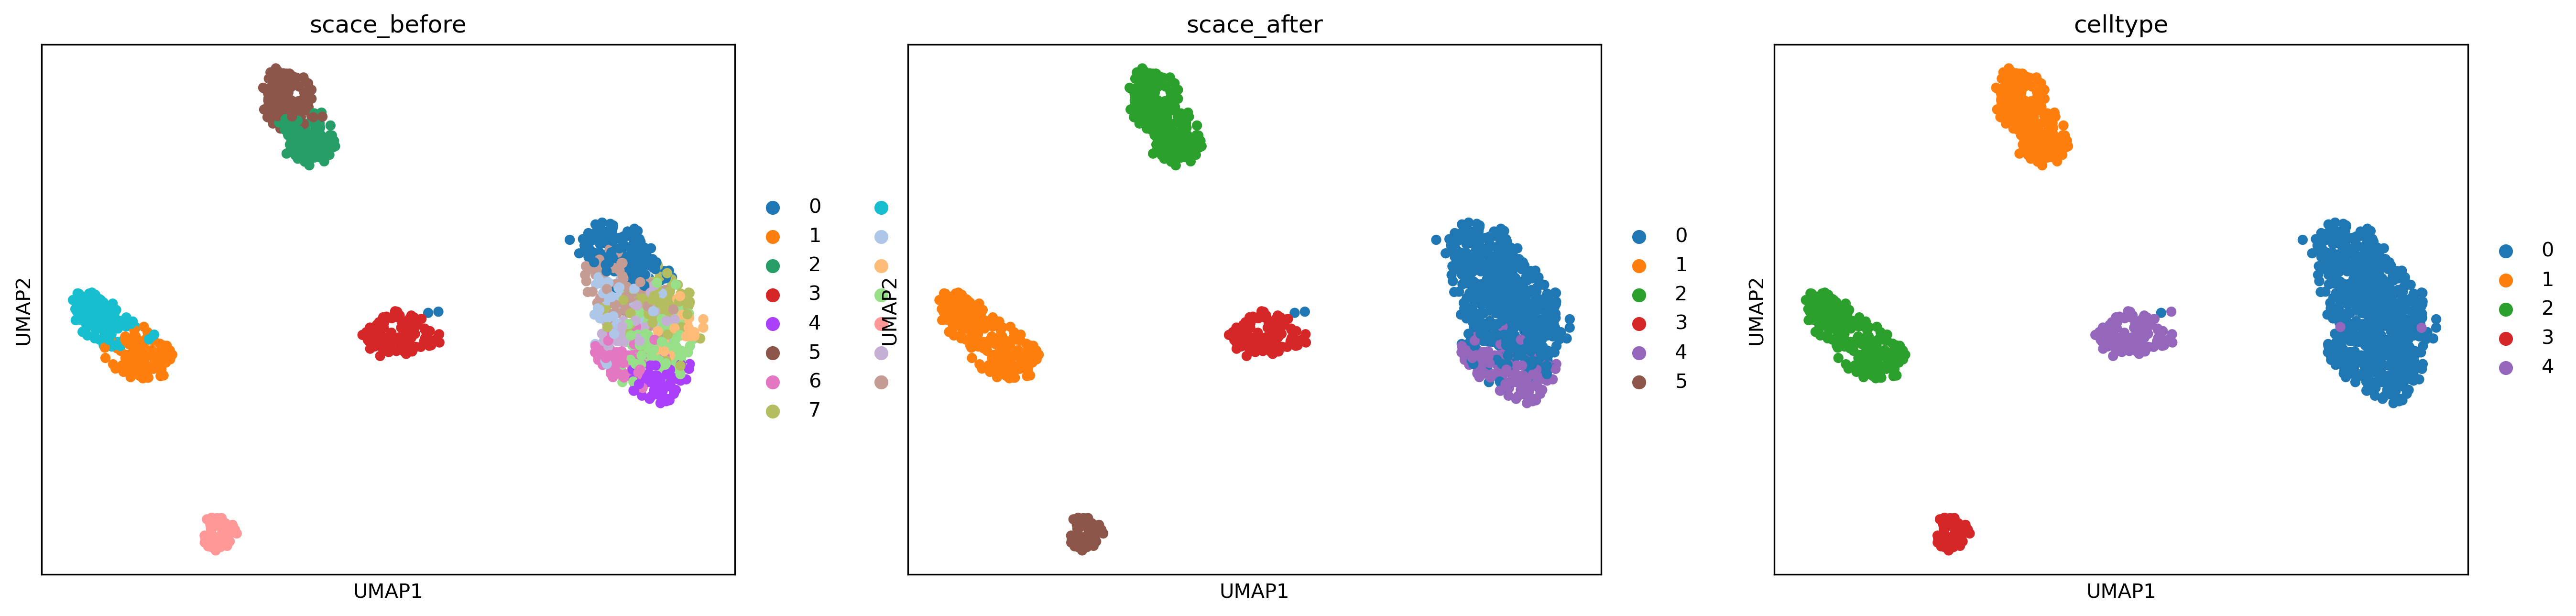

In [19]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

For the final time

In [20]:
adata_tmp = sc.AnnData(emb_all[-2])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[2][0], pred_all[2][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


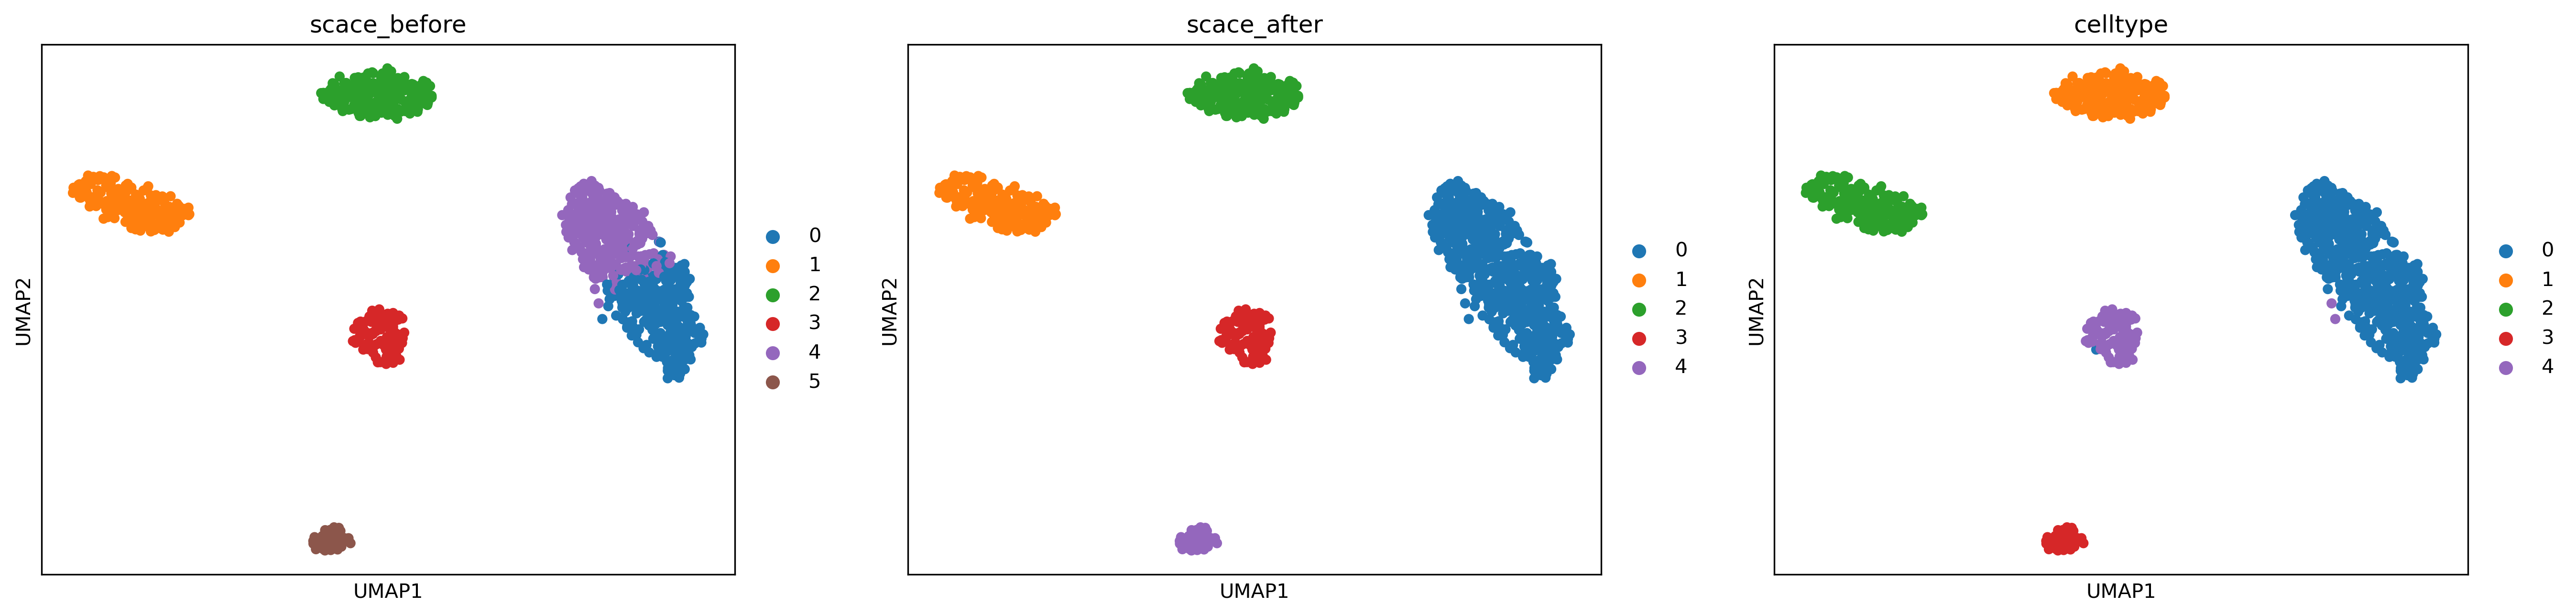

In [21]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])